In [1]:
import string
import random
from PIL import Image, ImageOps, ImageDraw, ImageFont, ImageChops
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from ipywidgets import interactive, HBox, VBox
from img_processing import preprocess_img, DITHER_MODES
from ascii_art_non_mono_utils import *
from ascii_art_non_mono_algorithms import *
from skimage import metrics

In [2]:
font_path = "fonts/OpenSans-Regular.ttf"
size = 12
fnt = ImageFont.truetype(font_path, size)

In [3]:
orig_img = Image.open("imgs/geometry_painting-700-1008.jpg").convert("L")
#orig_img = ImageOps.invert(orig_img)

print(orig_img.size)

(700, 1008)


In [4]:
def i_preprocess_img(scale_factor, contrast, brightness, quantize_colors, eq, dither):
    proc_img = preprocess_img(orig_img, 0.3, 1.1, 0.9, 0.2, 128, DITHER_MODES.NONE)
    plt.imshow(proc_img, cmap='gray', vmin=0, vmax=255, interpolation='none')

    plt.figure(figsize=(9, 3))
    plt.xticks([x for x in range(0, len(proc_img.histogram()), 25)])
    plt.bar([x for x in range(0, len(proc_img.histogram()))], proc_img.histogram())
    plt.grid()
    plt.show()

    return proc_img

interactive_preprocess = interactive(i_preprocess_img,
            scale_factor=(0.01, 1, 0.01),
            contrast=(0, 2, 0.01),
            brightness=(0, 2, 0.01),
            eq=(0, 1, 0.01),
            quantize_colors=(1, 256, 1),
            dither=DITHER_MODES)

controls = VBox(interactive_preprocess.children[:-1])
#display(HBox((controls, interactive_preprocess.children[-1])))

In [5]:
proc_img = interactive_preprocess.result

In [6]:
palette = list(filter(lambda a: a.isprintable(), string.printable))
print(len(palette))
print(palette)

95
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ']


In [7]:
# lrs = lazy_random_search(proc_img, palette, fnt)

# for i in range(0, 4001):
#     text = next(lrs)
#     if i % 1000 == 0:
#         print(evaluate_text_arr(text, proc_img, fnt))

# bg_img, draw = new_img_draw(proc_img.size)
# draw_text_arr(draw, text, fnt)
# ImageChops.add(proc_img, bg_img)

uwmwMwwwe;w_pum;>>1~: N,ww4_
(@wCOWMwm*47_aMwN@<7Q#^C.
(MWWV7*@MM%*M$f,}_^7<*M*@.
W%{|@!_%PdO(.@%@4>^&?_C4M@
UMMQf MQ_\_/~_7W*S@dW1|w@^"
(~W`Vd*#%W(W@H%N'Z%q d|@wP*
(^wQ6Z%@%3\WW&@>Z%1WOQM0
HUX4<*WW*M|Fg"%2QM@1*3M(N
hmQ%%MT`@@@K1mw WM3w3X1Z
(2W%2w>,aUDX%#@4%MaMaw% M
(._T7m-3?2"C4O@f@M4.Uw4W-$W:>
(@@_*MT?<`\3MZ'@(+P5@wW >%Q\ 
(~(m^dww&q>%T/'W'4/H mmP7*0Q"
(|WmW@_@M/|PW}W~1|^V.yQ%2>
(.`%f|O1Wq@/7Z*|1 ^XU^dH(dV'_dX
(%WwWdMM>*S7Q %_}U111~_U4{d
(^dQ@MP^`_Q/M/_/m>}mU;W<<Sw"
(%%1%w<>mgLq@w,ggy2Pww*^^a'
(,;;,;;;,;;,;@,;@;QZ**W@*\;,,2@;,^Q2`^;,

0.013095676458354922


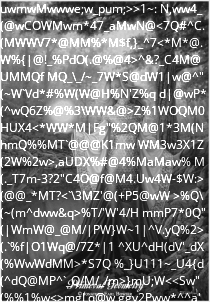

In [8]:
text = greedy_algorithm(proc_img, palette, fnt)

print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, fnt)
print(evaluate_text_arr(text, proc_img, fnt))
ImageChops.add(proc_img, bg_img)

0.007876607708927287
0.010369415155445129
0.008880698345975699
0.01121509824323621
;yDnm4+swmpxgi~R<c.~yfs`BVrxpn>1LVlS|Qbg{b?R2dZ#[UdV`G!6~y.G\eA6u&f0VH
j>!$uZRv[L^ua^F-Tx-QdR8X}{`?'v:|,Q._0\.Hb00mX9X58y7Uet^3s\W0B>hn0i~11g
ev;#q} Zul@Gi:!*6"LBV2`7.]u}N**`|X:2)8AdKkQ10%2='a;M2_8/|[qZyPZ2b],n6L
 Ups:qP%=ySx",]_PSspam1L<!G &047"O&wFfn=aOC':<73hU?fE0&[\` Z4vbDq,1t(g
OGY;V?KQ8Pf_((m,f1hS=h#9I1 JdM(2V%6~8!,)]RBiC:<*!9}<7BAo'v&]!\}vo;d_l0
k&fQgky#j^Z7$]U`chw%2RXd&?Zv@?K(nlHb8@o5)s3\;I"20?h),~#=ldP\En-n`=f\Tt
7M1 &LSo'c0&y5,-jCIDJtkPj&/[<_{szGCf82_2cYs_m)`{OG8`u4t-?i-Qi&Y<'-cxew
vLKI<b"=>44!YNf,EMLV^jF)51Y UJP&ZSNX<t[:qz=X0u+3aN^]g?/aN {%Qig'8q=d<m
H%q^E57DZVTHl':pyisBc@[K.r}bN|t]]!<:;8REai8h)i,0i<|vpPMyzTI7Qo#kNj]@7v
cZ2)?(}y.>}QF,ZXU3w]5$[?$v#Mx#vaHHp_ns[0#305n0S}/@h7q2xYH0?~a^*P0}'40j
2SE&,rMx)EQSR:WUP%fr1h9A57<&qSRs.UV~1'=%,oz(0+`fdJJD<bl[\f{NT.2[78Uz@l
cn_>s*M84/C9=M[Y+AE$3gkXM%"'l*Q28d0/_gq`*8S-{'8 ?i/jKkjJ0[T5vB0A$k6L&-
P,j1x$kH6aq6kw3/"BEQ\HaCrRPT"4:5Q{)e~y_bRw:nmhZ/0!y IX%Ibg1_r+3#i

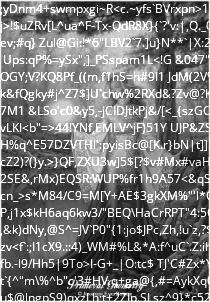

In [9]:
lhs = lazy_harmony_search(proc_img, palette, fnt, 5, 0.9, 0.3, len(palette)//2)

for i in range(4000):
    text = next(lhs)
    if i % 1000 == 0:
        print(evaluate_text_arr(text, proc_img, fnt))

text = next(lhs)
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, fnt)
print(evaluate_text_arr(text, proc_img, fnt))
ImageChops.add(proc_img, bg_img)